In [ ]:
#imports needed:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
#read in dataset from my github:
wineDF = pd.read_csv('https://raw.githubusercontent.com/CalColistra/IDS/main/Project5/problem2/wine.csv')
wineDF

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


# **Use the data set to demonstrate how we can use Naïve Bayes to classify a response variable. Specifically, we want to predict whether a wine is red or white based on whether the wine has high or low alcohol and sugar content.**

# Test for presence any missing attribute/target values and impute as necessary.

In [ ]:
wineDF.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

# Encode all categoric attributes

In [ ]:
#copy DF into new one:
wineDF2 = wineDF.copy()
#check types:
wineDF2.dtypes
#set objects to ints:
          #"Type":     {"Red": 1, "White": 2},
encoded = {
           "Alcohol_flag": {"Low": 1, "High": 2},
           "Sugar_flag": {"Low": 1, "High": 2}
           }
#note that  Low = 1,      High = 2
wineDF2 = wineDF2.replace(encoded)
wineDF2

,Type,Alcohol_flag,Sugar_flag
0,Red,2,2
1,Red,2,1
2,Red,1,2
3,Red,2,1
4,Red,1,1
...,...,...,...
3340,White,2,2
3341,White,2,1
3342,White,2,1
3343,White,2,1


# Create contingency tables (cross tabulations) for:
a. Type vs. alcohol content

b. Type vs. Sugar content

In [ ]:
# Cross tabulation of Type and Alcohol Content:

p_crosstab = pd.crosstab(wineDF2.Type, wineDF2.Alcohol_flag)

print(p_crosstab)

Alcohol_flag     1     2
Type                    
Red            600   485
White         1084  1176


In [ ]:
# Cross tabulation of Type and Alcohol Content:

p_crosstab2 = pd.crosstab(wineDF2.Type, wineDF2.Sugar_flag)

print(p_crosstab2)

Sugar_flag    1     2
Type                 
Red         848   237
White       878  1382


# Plot the two cross tabulations:

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

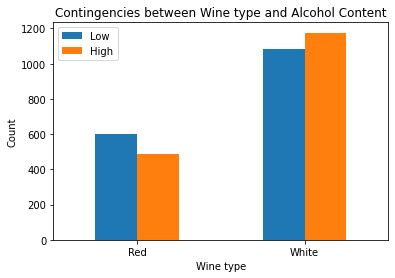

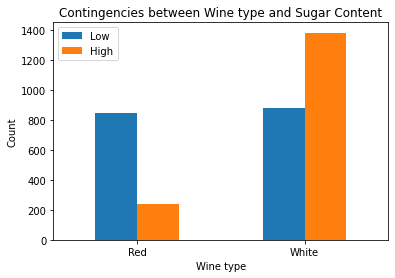

In [ ]:
# Create barplot on alcohol content
p_crosstab.plot(kind="bar")
plt.title("Contingencies between Wine type and Alcohol Content")
plt.xlabel("Wine type")
plt.ylabel("Count")
plt.legend(["Low", "High"])
plt.xticks(rotation=0, horizontalalignment="center")


# Create barplot on sugar content
p_crosstab2.plot(kind="bar")
plt.title("Contingencies between Wine type and Sugar Content")
plt.xlabel("Wine type")
plt.ylabel("Count")
plt.legend(["Low", "High"])
plt.xticks(rotation=0, horizontalalignment="center")


# **Calculate the following probabilities:**

# The prior probability of Type = Red and Type = White.

In [ ]:
# counting unique values
print(wineDF2['Type'].value_counts())
wineDF.describe()

White    2260
Red      1085
Name: Type, dtype: int64


,Type,Alcohol_flag,Sugar_flag
count,3345,3345,3345
unique,2,2,2
top,White,Low,Low
freq,2260,1684,1726


In [ ]:
white = 2260  #number of wine type white
red = 1085  #number of wine type red
total = white + red  #add to find total
pWhite = white/total  #divide to find p(type = white)
pRed = red/total  #divide to find p(type = red)
print("The probability of (type = Red) = ", pRed)
print("The probability of (type = White) = ", pWhite)

The probability of (type = Red) =  0.3243647234678625
The probability of (type = White) =  0.6756352765321375


# The probability of high and low alcohol content.

In [ ]:
print(wineDF['Alcohol_flag'].value_counts())  #count amount high and low for alc content

Low     1684
High    1661
Name: Alcohol_flag, dtype: int64


In [ ]:
low = 1684  #num low
high = 1661  #num high
pLowAlc = low/total  #divide to find p(low)
pHighAlc = high/total  #divide to find p(high)
print("The probability of (alc content = low) = ", pLowAlc)
print("The probability of (alc content = high) = ", pHighAlc)

The probability of (alc content = low) =  0.5034379671150971
The probability of (alc content = high) =  0.49656203288490286


# The probability of high and low sugar content.

In [ ]:
print(wineDF['Sugar_flag'].value_counts())  #count high and low for sugar content

Low     1726
High    1619
Name: Sugar_flag, dtype: int64


In [ ]:
low = 1726  #num low
high = 1619  #num high
pLowSugar = low/total  #divide to find p(low)
pHighSugar = high/total  #divide to find p(high)
print("The probability of (Sugar content = low) = ", pLowSugar)
print("The probability of (Sugar content = high) = ", pHighSugar)

The probability of (Sugar content = low) =  0.5159940209267564
The probability of (Sugar content = high) =  0.48400597907324366


# The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red)

In [ ]:
p_crosstab  #show the cross tab for alcohol content

Alcohol_flag,1,2
Type,,
Red,600,485
White,1084,1176


p(A given B) = p(A AND B) / P(B)

A: alc_flag = high

B: Type = red

In [ ]:
#p(A AND B) / p(B):
((pHighAlc * pRed) / pRed)

0.4965620328849028

In [ ]:
print("p(Alc Flag = high given that the wine type = red): ")
conditional1 = 485/total
conditional1

p(Alc Flag = high given that the wine type = red): 


0.14499252615844543

In [ ]:
conditional2 = 600/total
print("p(Alc Flag = Low given that the wine type = red): ")
conditional2

p(Alc Flag = Low given that the wine type = red): 


0.17937219730941703

# The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).

In [ ]:
p_crosstab2  #show the cross tab for sugar content

Sugar_flag,1,2
Type,,
Red,848,237
White,878,1382


In [ ]:
conditional3 = 237/total
print("p(Sugar Flag = high given that the wine type = red): ")
conditional3

p(Sugar Flag = high given that the wine type = red): 


0.07085201793721974

In [ ]:
conditional4 = 848/total
print("p(Sugar Flag = low given that the wine type = red): ")
conditional4

p(Sugar Flag = low given that the wine type = red): 


0.25351270553064276

# **Create NB classifiers and record their accuracy on various training/test ratios, e.g., 80-20, 75-25, 70-30, 60-40, 50-50. Be sure to shuffle and stratify the data sets**

80-20 ratio:

In [ ]:
# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

          
encoded = {
           "Type": {"Red": 1, "White": 2},
           "Alcohol_flag": {"Low": 1, "High": 2},
           "Sugar_flag": {"Low": 1, "High": 2}
           }
#note that Red wine = 1, White wine = 2
#          Low = 1,      High = 2
wineDF2 = wineDF2.replace(encoded)


# Prepare input and output for learning
X = wineDF2.drop(columns='Type')  #input
y = wineDF2['Type']  #target



# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, shuffle=True, 
                                                    random_state=42)

# Display the sets
#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

# Train the model 
NBmodel.fit(X_train, y_train)
score1 = NBmodel.score(X_test, y_test)

y_pred = NBmodel.predict(X_test)



score2 = NBmodel.score(y_test, y_pred)

# Calculate model accuracy on both training and test data

scores = [ score1, score2]



# Plot the accuracy claues
labels = ["Training", "Test"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data, 80-20 ratio')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

75-25 ratio:

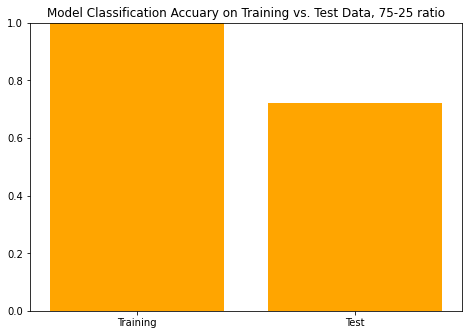

In [ ]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, shuffle=True, test_size=0.25, stratify=y)

# Display the sets
#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

# Train the model 
NBmodel.fit(x_train, y_train)

y_pred = NBmodel.predict(x_test)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(x_test, y_pred), NBmodel.score(x_test, y_test)]

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data, 75-25 ratio')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [ ]:
NBmodel.score(x_test, y_test)

0.7228195937873357

70-30 ratio:

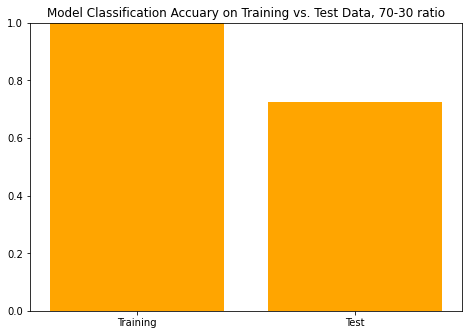

In [ ]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, shuffle=True, test_size=0.30, stratify=y)

# Display the sets
#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

# Train the model 
NBmodel.fit(x_train, y_train)

y_pred = NBmodel.predict(x_test)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(x_test, y_pred), NBmodel.score(x_test, y_test)]

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data, 70-30 ratio')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [ ]:
NBmodel.score(x_test, y_test)

0.7260956175298805

60-40 ratio:

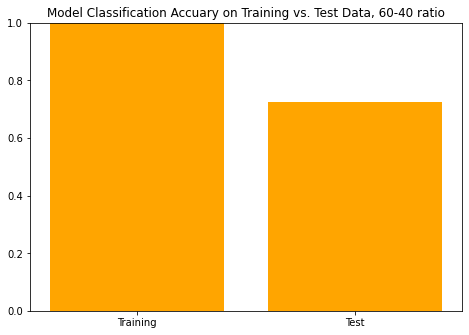

In [ ]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, shuffle=True, test_size=0.40, stratify=y)

# Display the sets
#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

# Train the model 
NBmodel.fit(x_train, y_train)

y_pred = NBmodel.predict(x_test)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(x_test, y_pred), NBmodel.score(x_test, y_test)]

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data, 60-40 ratio')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [ ]:
NBmodel.score(x_test, y_test)

0.7242152466367713

50-50 ratio:

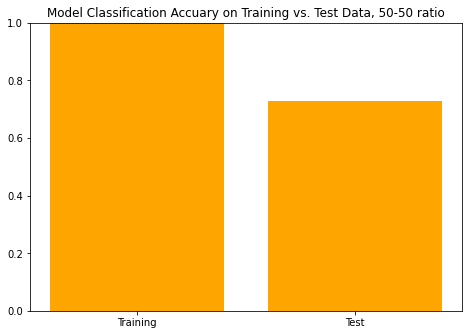

In [ ]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, shuffle=True, test_size=0.50, stratify=y)

# Display the sets
#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

# Train the model 
NBmodel.fit(x_train, y_train)

y_pred = NBmodel.predict(x_test)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(x_test, y_pred), NBmodel.score(x_test, y_test)]

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data, 50-50 ratio')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [ ]:
NBmodel.score(x_test, y_test)

0.7280334728033473